In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from openai import OpenAI
import os
import matplotlib.pyplot as plt

client = OpenAI()

def get_embeddings(text):
    response = client.embeddings.create(
        input=text,
        model='text-embedding-3-small'
    )
    return response.data[0].embedding


In [189]:
df = pd.read_csv('../data/filtered_volatility_df.csv')
df.head()

,timestamp,price,tweet_id,handle,ticker,sentiment_label,sentiment_score,top_topic,Technology,Healthcare and Pharmaceuticals,...,Energy,Agriculture,Automotive,minutes_since_tweet,log_return,volatility,price_change_pct,average_volatility,price_spike,weighted_volatility
0,2016-12-05 12:15:00,99.002000,805384490533212160,@realDonaldTrump,WYNN,Neutral,0.949813,Technology,0.464619,0.449575,...,0.318766,0.122376,0.381047,1441.658,NaN,0.017418,NaN,0.321163,0,0.017418
1,2016-12-05 12:15:00,27.458544,805384490533212160,@realDonaldTrump,FOX,Neutral,0.949813,Technology,0.464619,0.449575,...,0.318766,0.122376,0.381047,1441.658,-1.282463,0.004898,NaN,0.058880,1,0.007542
2,2016-12-05 12:15:00,61.312195,805384490533212160,@realDonaldTrump,LVS,Neutral,0.949813,Technology,0.464619,0.449575,...,0.318766,0.122376,0.381047,1441.658,NaN,0.016306,NaN,0.125180,1,0.034060
3,2016-12-05 12:15:00,29.001725,805384490533212160,@realDonaldTrump,MGM,Neutral,0.949813,Technology,0.464619,0.449575,...,0.318766,0.122376,0.381047,1441.658,-0.748623,0.007139,NaN,0.062956,1,0.011124
4,2016-12-05 12:16:00,98.930269,805384490533212160,@realDonaldTrump,WYNN,Neutral,0.949813,Technology,0.464619,0.449575,...,0.318766,0.122376,0.381047,1442.658,1.227060,0.036447,NaN,0.321163,1,0.140217


In [190]:
df['tweet_id'].nunique()

418

In [191]:
df.columns

Index(['timestamp', 'price', 'tweet_id', 'handle', 'ticker', 'sentiment_label',
       'sentiment_score', 'top_topic', 'Technology',
       'Healthcare and Pharmaceuticals', 'Defense and Aerospace', 'Financials',
       'Airlines and Travel', 'Energy', 'Agriculture', 'Automotive',
       'minutes_since_tweet', 'log_return', 'volatility', 'price_change_pct',
       'average_volatility', 'price_spike', 'weighted_volatility'],
      dtype='object')

In [271]:
rows = df.groupby('tweet_id').get_group(805384490533212160)

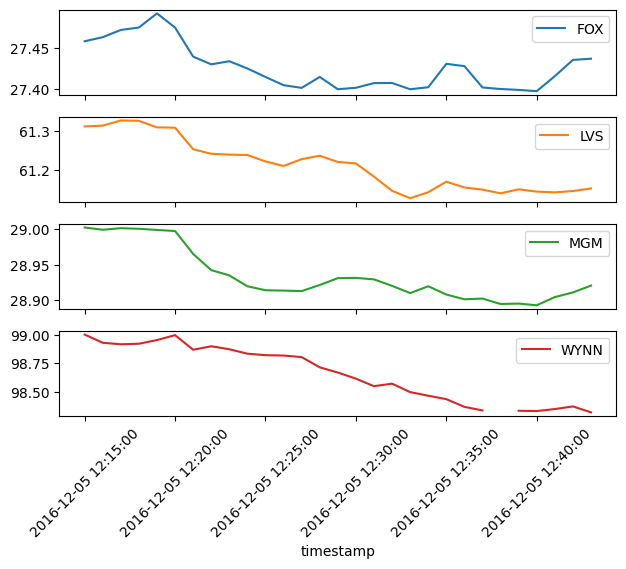

In [276]:
rows.pivot(index='timestamp', columns='ticker', values='price').plot(subplots=True)
plt.tight_layout()
plt.xticks(rotation=45);

In [ ]:
tweets = df.groupby(['tweet_id', 'sentiment_label', 'handle', 'ticker'])['price']\
    .apply(lambda price: (price.values[-1]-price.values[0])/(price.values[0])).reset_index()
tweets.head()

,tweet_id,sentiment_label,handle,ticker,price
0,805384490533212160,Neutral,@realDonaldTrump,FOX,-0.000775
1,805384490533212160,Neutral,@realDonaldTrump,LVS,-0.002607
2,805384490533212160,Neutral,@realDonaldTrump,MGM,-0.002798
3,805384490533212160,Neutral,@realDonaldTrump,WYNN,-0.006869
4,809392491514527744,Negative,@realDonaldTrump,FOX,0.013738


In [ ]:
tweets['price'].min()

np.float64(-0.9479775559333474)

<Axes: xlabel='sentiment_label', ylabel='price'>

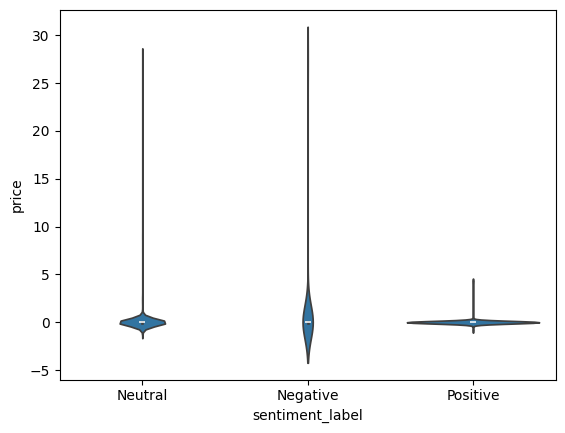

In [ ]:
sns.violinplot(y='price', x='sentiment_label', data=tweets)

In [ ]:
tweets.groupby('sentiment_label')['price'].median()

sentiment_label
Negative   -0.000203
Neutral     0.001416
Positive    0.001370
Name: price, dtype: float64

In [ ]:
tweets_df = pd.read_csv('../data/tweets_with_sentiment_and_topic.csv')
tweets_df.head()

,Unnamed: 0,id,user_id,handle,clean_text,lang,timestamp,sentiment_label,sentiment_score,top_topic,Cryptocurrency and Fintech,Technology,Healthcare and Pharmaceuticals,Defense and Aerospace,Financials,Airlines and Travel,Energy,Agriculture,Automotive
0,0,1603456812723933194,12.0,jack,"RT @ODELL: @nobsbitcoin love to see it, if yal...",en,2022-12-15 18:27:49.597000+00:00,Neutral,0.977740,Cryptocurrency and Fintech,0.757990,0.376340,0.045903,0.032895,0.019666,0.019118,0.013074,0.010588,0.007226
1,1,1600412216687149056,12.0,jack,RT @TheGuySwann: It would be so amazing to see...,en,2022-12-07 08:49:41.336000+00:00,Positive,0.999987,Cryptocurrency and Fintech,0.868653,0.853358,0.025603,0.044147,0.210190,0.011476,0.110531,0.037469,0.007175
2,2,1595502702854692866,12.0,jack,RT @kendricklamar: big steppers tour (direct...,en,2022-11-23 19:41:02.024000+00:00,Neutral,0.999613,Technology,0.012002,0.252524,0.057174,0.072260,0.034317,0.007996,0.006217,0.003851,0.017827
3,3,1589450807216599040,12.0,jack,@litcapital @elonmusk Sure,en,2022-11-07 02:52:57.665000+00:00,Neutral,0.985752,Technology,0.284053,0.768173,0.263169,0.119607,0.364800,0.058842,0.239539,0.033245,0.125718
4,4,1582442966521503745,12.0,jack,RT @bluesky: Bluesky is building a social prot...,en,2022-10-18 18:46:18.244000+00:00,Neutral,0.999923,Technology,0.000134,0.058334,0.002962,0.001737,0.000540,0.004032,0.008653,0.003117,0.000706


In [ ]:
tweets_merged = tweets.merge(tweets_df[['id', 'clean_text']].rename(columns={'id': 'tweet_id'}))

<Axes: >

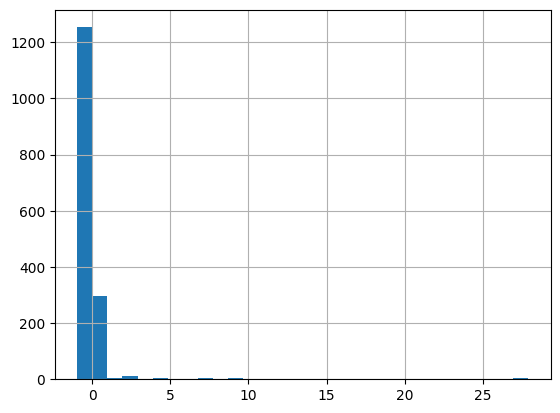

In [ ]:
tweets_merged['price'].hist(bins=30)

In [ ]:
tweets_merged['labels'].value_counts()

labels
neu    1449
pos      87
neg      52
Name: count, dtype: int64

In [ ]:
tweets_merged.head()

,tweet_id,sentiment_label,handle,ticker,price,labels,clean_text
0,805384490533212160,Neutral,@realDonaldTrump,FOX,-0.000775,neu,but these companies are able to move between a...
1,805384490533212160,Neutral,@realDonaldTrump,LVS,-0.002607,neu,but these companies are able to move between a...
2,805384490533212160,Neutral,@realDonaldTrump,MGM,-0.002798,neu,but these companies are able to move between a...
3,805384490533212160,Neutral,@realDonaldTrump,WYNN,-0.006869,neu,but these companies are able to move between a...
4,809392491514527744,Negative,@realDonaldTrump,FOX,0.013738,neu,"If Russia, or some other entity, was hacking, ..."


In [ ]:
tweets_merged.dtypes

tweet_id              int64
sentiment_label      object
handle               object
ticker               object
price               float64
labels             category
clean_text           object
dtype: object

In [244]:
tweets_groups = tweets_merged.dropna(subset=['price'])\
    .groupby(['tweet_id', 'sentiment_label', 'handle', 'clean_text'])['price'].mean().reset_index()

In [245]:
tweets_groups['label'] = pd.cut(tweets_groups['price'], bins=[-100,-.02, .02, 100], labels=['neg', 'neu', 'pos']).astype(str)

In [246]:
tweets_groups['label'].value_counts()

label
neu    287
pos     83
neg     45
Name: count, dtype: int64

In [247]:
tweets_groups[['sentiment_label', 'label']].value_counts().unstack()

label,neg,neu,pos
sentiment_label,,,
Negative,1,10,3
Neutral,42,248,77
Positive,2,29,3


In [248]:
tweets_groups[['handle', 'label']].value_counts().unstack().fillna(0)

label,neg,neu,pos
handle,,,
@SenWarren,4.0,0.0,10.0
@elonmusk,3.0,7.0,6.0
@nntaleb,23.0,14.0,45.0
@paulkrugman,0.0,5.0,0.0
@realDonaldTrump,11.0,200.0,15.0
@richardbranson,4.0,61.0,7.0


## Get Embedding of Tweets

In [196]:
tweets_embed = tweets_groups[['tweet_id', 'clean_text']].copy()

In [ ]:
tweets_embed['embeddings'] = tweets_embed['clean_text'].apply(get_embeddings)


In [199]:
tweets_embed[['tweet_id', 'clean_text', 'embeddings']].to_csv('../data/07_tweet_embedding.csv', index=False)

## Modeling 

In [251]:
tweets_embed = pd.read_csv('../data/07_tweet_embedding.csv')
tweets_embed['embeddings'] = tweets_embed['embeddings'].apply(lambda x: np.array(eval(x)))
tweets_embed.head()

,tweet_id,clean_text,embeddings
0,805384490533212160,but these companies are able to move between a...,"[-0.004584083799272776, 0.011698659509420395, ..."
1,809392491514527744,"If Russia, or some other entity, was hacking, ...","[-0.014848003163933754, -0.006731787230819464,..."
2,811555413942566912,Campaigning for votes under the Electoral Coll...,"[0.022019246593117714, 0.009481358341872692, 0..."
3,816619023135834112,"Julian Assuage said ""a 14 year old could have ...","[0.028877997770905495, -0.02798275463283062, 0..."
4,817328258085769218,The dishonest media is not reporting that any ...,"[-0.009078455157577991, 0.02332666516304016, 0..."


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier, log_evaluation, early_stopping

In [252]:
tweets_groups_embed = tweets_groups.merge(tweets_embed[['tweet_id', 'embeddings']])
tweets_groups_embed.head()

,tweet_id,sentiment_label,handle,clean_text,price,label,embeddings
0,805384490533212160,Neutral,@realDonaldTrump,but these companies are able to move between a...,-0.003262,neu,"[-0.004584083799272776, 0.011698659509420395, ..."
1,809392491514527744,Negative,@realDonaldTrump,"If Russia, or some other entity, was hacking, ...",-0.003214,neu,"[-0.014848003163933754, -0.006731787230819464,..."
2,811555413942566912,Neutral,@realDonaldTrump,Campaigning for votes under the Electoral Coll...,-0.000921,neu,"[0.022019246593117714, 0.009481358341872692, 0..."
3,816619023135834112,Neutral,@realDonaldTrump,"Julian Assuage said ""a 14 year old could have ...",0.011660,neu,"[0.028877997770905495, -0.02798275463283062, 0..."
4,817328258085769218,Neutral,@realDonaldTrump,The dishonest media is not reporting that any ...,0.001782,neu,"[-0.009078455157577991, 0.02332666516304016, 0..."


In [264]:
X = np.array([np.array(x) for x in tweets_groups_embed['embeddings'].values])
y = tweets_groups_embed['label'].values
X.shape, y.shape

((415, 1536), (415,))

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123, stratify=y)

In [257]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.00      0.00      0.00        16
         neu       0.71      1.00      0.83       101
         pos       0.50      0.07      0.12        29

    accuracy                           0.71       146
   macro avg       0.40      0.36      0.32       146
weighted avg       0.59      0.71      0.60       146



/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [258]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.00      0.00      0.00        16
         neu       0.70      1.00      0.82       101
         pos       1.00      0.03      0.07        29

    accuracy                           0.70       146
   macro avg       0.57      0.34      0.30       146
weighted avg       0.68      0.70      0.58       146



/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [259]:
lg = LGBMClassifier(num_leaves=4, n_estimators=1000, learning_rate=0.01, objective='multiclass', force_col_wise=True)
lg.fit(X_train, y_train, eval_set=(X_test, y_test), callbacks=[log_evaluation(period=100), early_stopping(20)])

[LightGBM] [Info] Total Bins 139089
[LightGBM] [Info] Number of data points in the train set: 269, number of used features: 1536
[LightGBM] [Info] Start training from score -2.227416
[LightGBM] [Info] Start training from score -0.368965
[LightGBM] [Info] Start training from score -1.605727
Training until validation scores don't improve for 20 rounds
[100]	valid_0's multi_logloss: 0.76496
[200]	valid_0's multi_logloss: 0.751531
Early stopping, best iteration is:
[184]	valid_0's multi_logloss: 0.750227


LGBMClassifier(force_col_wise=True, learning_rate=0.01, n_estimators=1000,
               num_leaves=4, objective='multiclass')

In [260]:
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       1.00      0.06      0.12        16
         neu       0.71      1.00      0.83       101
         pos       0.50      0.03      0.06        29

    accuracy                           0.71       146
   macro avg       0.74      0.37      0.34       146
weighted avg       0.70      0.71      0.60       146



/Users/roys/miniconda3/envs/siads/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [104]:
VIX_df = pd.read_csv('../data/VIX1.csv')
VIX_df['DATE'] = pd.to_datetime(VIX_df['DATE'], format='%m/%d/%y')
VIX_df.head()

,DATE,AVG VIX
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26


In [105]:
VIX_df

,DATE,AVG VIX
0,1990-01-02,17.2400
1,1990-01-03,18.1900
2,1990-01-04,19.2200
3,1990-01-05,20.1100
4,1990-01-08,20.2600
...,...,...
8904,2025-04-11,40.3325
8905,2025-04-14,32.6425
8906,2025-04-15,29.9675
8907,2025-04-16,32.5800
